# How does player height and weight correlate with performance stats?

### Methodology

1. 

In [66]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
df1 = pd.read_excel('nba_player_data.xlsx')
df2 = pd.read_csv('PlayerIndex_nba_stats.csv')

# Merging the DataFrames
df2 = df2.rename(columns={'PERSON_ID': 'PLAYER_ID'})
df = pd.merge(df1, df2, on='PLAYER_ID', how='left')

# Data Cleaning
df.drop(columns=['RANK'], inplace=True)
df['season_start_year'] = df['Year'].str[:4].astype(int)
df['TEAM'] = df['TEAM'].replace(to_replace=['NOP','NOH'], value='NO')
df['Season_type'] = df['Season_type'].replace('Regular%20Season','Regular Season')

# Create Per Game Average Columns
df['PPG'] = df['PTS_x'] / df['GP']
df['RPG'] = df['REB_x'] / df['GP']
df['APG'] = df['AST_x'] / df['GP']
df['SPG'] = df['STL'] / df['GP'] 
df['BPG'] = df['BLK'] / df['GP']

In [67]:
def convert_height(height_str):
    try:
        feet, inches = height_str.split('-')
        number = int(feet) + int(inches) / 12
        return round(number, 2)
    except:
        return None  # or np.nan

df['HEIGHT'] = df['HEIGHT'].apply(convert_height)

In [ ]:
df_HP = df['PPG'].groupby(df['HEIGHT']).mean().round(2)

df_HP

HEIGHT
5.75    12.71
5.83     5.71
5.92     5.94
6.00    10.56
6.08     7.96
6.17    10.38
6.25     9.25
6.33     9.17
6.42     7.93
6.50     7.71
6.58     8.32
6.67     8.46
6.75     7.44
6.83     7.25
6.92     9.52
7.00     7.67
7.08     9.14
7.17     9.37
7.25     2.28
7.33     5.75
7.42     1.50
Name: PPG, dtype: float64

<Axes: xlabel='HEIGHT', ylabel='PPG'>

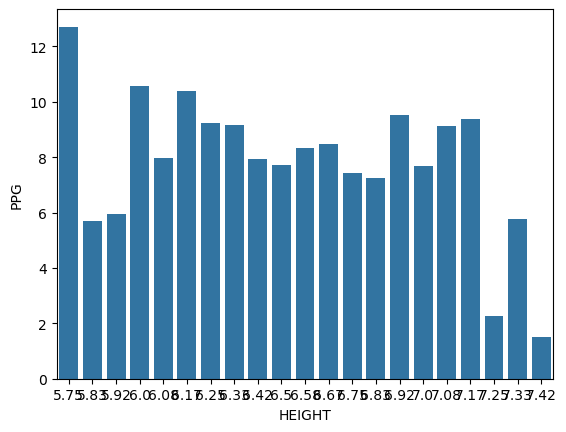

In [69]:
sns.barplot(data=df_HP)

In [109]:
df['WEIGHT_category'] = pd.cut(df['WEIGHT'], bins=10)

df['WEIGHT_category'].sample(10)

5080    (200.0, 220.0]
1258    (200.0, 220.0]
2480    (300.0, 320.0]
781     (220.0, 240.0]
1180    (200.0, 220.0]
3462    (220.0, 240.0]
4093    (200.0, 220.0]
2706    (180.0, 200.0]
1874    (200.0, 220.0]
6889    (200.0, 220.0]
Name: WEIGHT_category, dtype: category
Categories (10, interval[float64, right]): [(159.8, 180.0] < (180.0, 200.0] < (200.0, 220.0] < (220.0, 240.0] ... (280.0, 300.0] < (300.0, 320.0] < (320.0, 340.0] < (340.0, 360.0]]

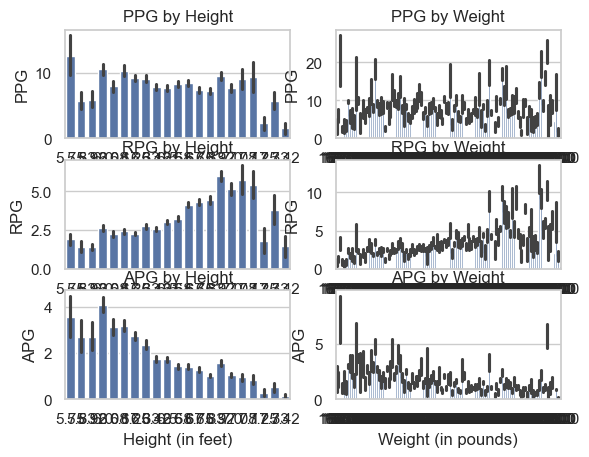

In [74]:
per_stats = ['PPG', 'RPG', 'APG']

sns.set_theme(style='whitegrid')

fig, axs = plt.subplots(len(per_stats), 2)

for i, stat in enumerate(per_stats):
    sns.barplot(data=df, x='HEIGHT', y=stat, ax=axs[i, 0])
    axs[i, 0].set_title(f'{stat} by Height')
    axs[i, 0].set_xlabel('Height (in feet)')
    axs[i, 0].set_ylabel(stat)

    sns.barplot(data=df, x='WEIGHT', y=stat, ax=axs[i, 1])
    axs[i, 1].set_title(f'{stat} by Weight')
    axs[i, 1].set_xlabel('Weight (in pounds)')
    axs[i, 1].set_ylabel(stat)